In [1]:

from netCDF4 import Dataset
import numpy as np
import xarray as xr
#from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from pythia_datasets import DATASETS
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt


In [2]:
file1 = xr.open_dataset('/Users/spv2023/MGWR_datasets/inputs/etopo1_MC.nc')
file2 = xr.open_dataset('/Users/spv2023/MGWR_datasets/inputs/IMERG_V07_2000_2023_monthly.nc')
file3 = xr.open_dataset('/Users/spv2023/MGWR_datasets/inputs/topographic_factors_etopo.nc')
#file1
#file2
#file3

/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/coding/times.py:240: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/spv2023/Downloads/conda/envs/myenv/lib/python3.11/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


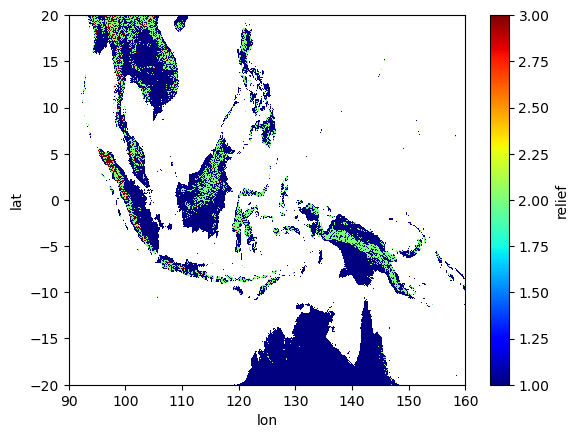

In [3]:
#file1.B_BATHY[0,:,:].plot(cmap='jet', vmax=3000)
#file2.imerg[0,:,:].plot(cmap='jet', vmax=30, x='lon', y='lat')
#file3.slope[:,:].plot(cmap='jet', x='lon', y='lat')
file3.relief[:,:].plot(cmap='jet', x='lon', y='lat')

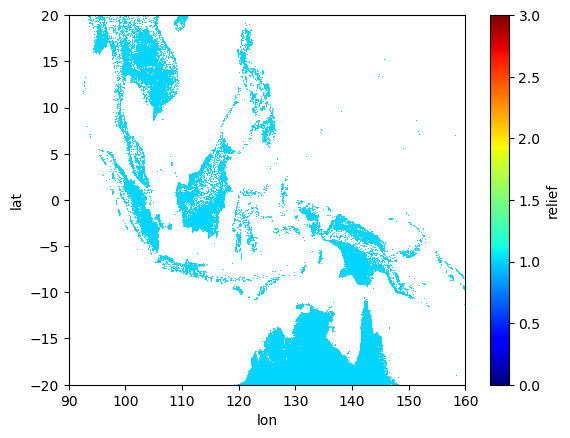

In [4]:
# First, We will develop a land mask data array that we can use to mask out the nan values:

relief = file3.relief[:,:]
high_land = relief.where(relief > 1)
low_land = relief.where(relief == 1)
#high_land.plot(cmap='jet',  vmin=0, vmax=3, x='lon', y='lat')
low_land.plot(cmap='jet',  vmin=0, vmax=3, x='lon', y='lat')

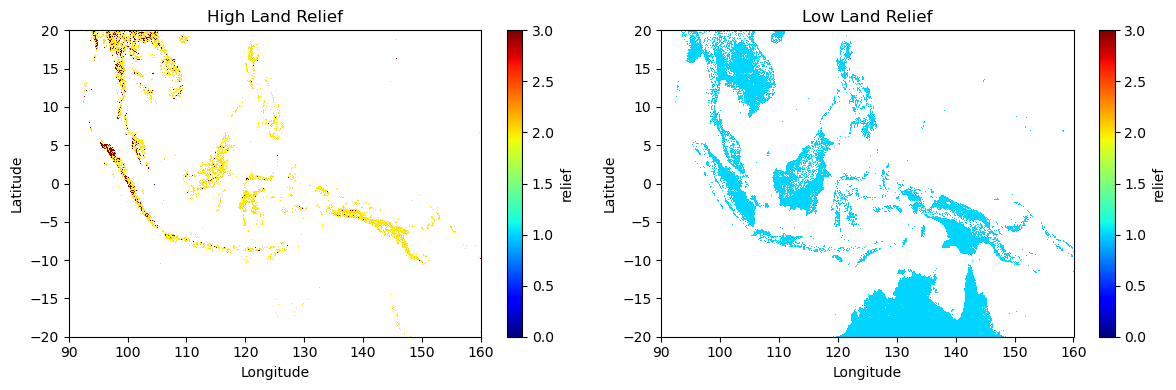

In [5]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot high land
sub1 = high_land.plot(ax=axs[0], cmap='jet', vmin=0, vmax=3, x='lon', y='lat')
axs[0].set_title('High Land Relief')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Add colorbar for low land plot
#plt.colorbar(sub1, ax=axs[1], label='Relief Value')


# Plot low land
sub2 = low_land.plot(ax=axs[1], cmap='jet', vmin=0, vmax=3,x='lon', y='lat')
axs[1].set_title('Low Land Relief')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

# Add colorbar for low land plot
#plt.colorbar(sub2, ax=axs[1], label='Relief Value')

#colorbar.remove()
#colorbar.remove()

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
rain = file2.imerg[:,:,:]

# Get dimensions of imerg
dims = file2.imerg.dims  # Returns a dictionary of dimension names and sizes
shape = file2.imerg.shape  # Returns a tuple of the shape of the array

# Print dimensions and shape
print("Dimensions:", dims)
print("Shape:", shape)
shape[0]

Dimensions: ('time', 'lon', 'lat')
Shape: (275, 701, 401)


275

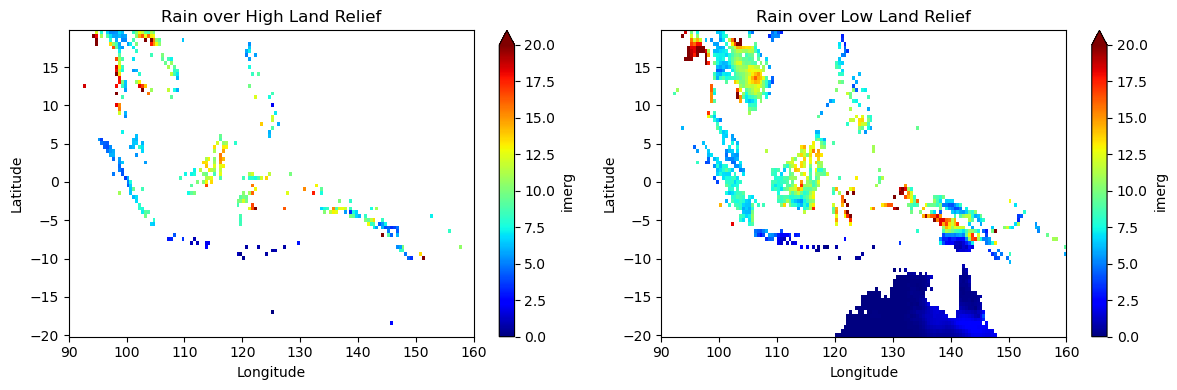

In [7]:
rain_high_land = rain.where(relief > 1)
rain_low_land  = rain.where(relief == 1)
#rain_high_land.plot(cmap='jet',  vmin=0, vmax=30,x='lon', y='lat') 

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot high land
sub1 = rain_high_land[0,:,:].plot(ax=axs[0], cmap='jet', vmin=0, vmax=20, x='lon', y='lat')
axs[0].set_title('Rain over High Land Relief')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Add colorbar for low land plot
#plt.colorbar(sub1, ax=axs[1], label='Relief Value')


# Plot low land
sub2 = rain_low_land[0,:,:].plot(ax=axs[1], cmap='jet', vmin=0, vmax=20,x='lon', y='lat')
axs[1].set_title('Rain over Low Land Relief')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

# Add colorbar for low land plot
#plt.colorbar(sub2, ax=axs[1], label='Relief Value')

#colorbar.remove()
#colorbar.remove()

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
#setting the domain of interest
top = 10
bottom = -11
left = 90
right = 160
rain_high_sel = rain_high_land.sel(lon=slice(left,right), lat=slice(bottom, top))
rain_low_sel = rain_low_land.sel(lon=slice(left,right), lat=slice(bottom, top))

# taking the average along lon and lat
high_rain_lon_avg = rain_high_sel.mean(dim=['lon'])
high_rain_lat_avg = rain_high_sel.mean(dim=['lat'])

low_rain_lon_avg = rain_low_sel.mean(dim=['lon'])
low_rain_lat_avg = rain_low_sel.mean(dim=['lat'])

#high_rain_lon_avg.plot(cmap='jet',  vmin=0, vmax=30,x='lat', y='time') 
#low_rain_lon_avg.plot(cmap='jet',  vmin=0, vmax=30,y='lat', x='time') 




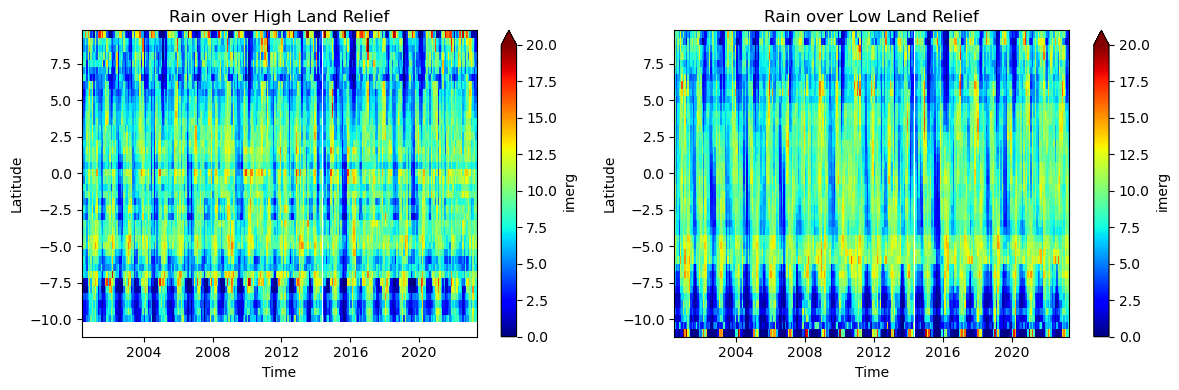

In [9]:

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot high land
sub1 = high_rain_lon_avg.plot(ax=axs[0], cmap='jet', vmin=0, vmax=20, y='lat', x='time')
axs[0].set_title('Rain over High Land Relief')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Latitude')

# Add colorbar for low land plot
#plt.colorbar(sub1, ax=axs[1], label='Relief Value')

# Plot low land
sub2 = low_rain_lon_avg.plot(ax=axs[1], cmap='jet', vmin=0, vmax=20, y='lat', x='time')
axs[1].set_title('Rain over Low Land Relief')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Latitude')

# Adjust layout
plt.tight_layout()
plt.show()


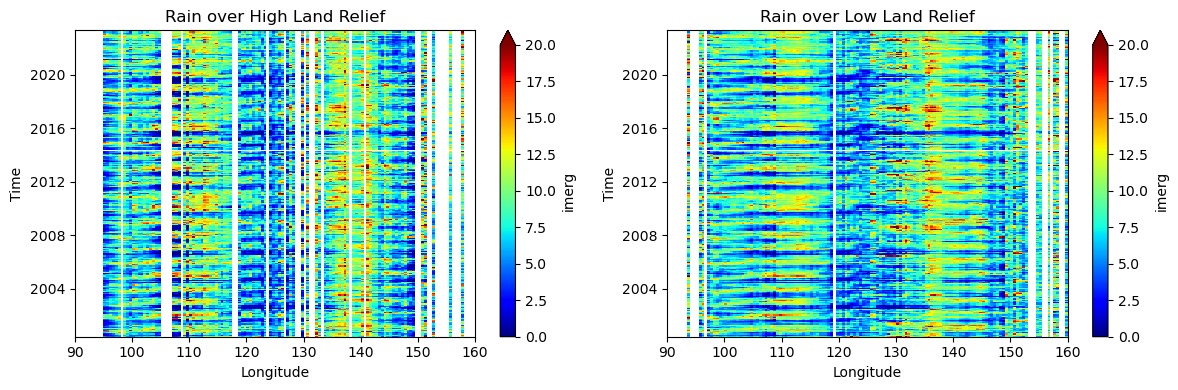

In [10]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sub1 = high_rain_lat_avg.plot(ax=axs[0], cmap='jet', vmin=0, vmax=20, x='lon', y='time')
axs[0].set_title('Rain over High Land Relief')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Time')

# Add colorbar for low land plot
#plt.colorbar(sub1, ax=axs[1], label='Relief Value')


# Plot low land
sub2 = low_rain_lat_avg.plot(ax=axs[1], cmap='jet', vmin=0, vmax=20, x='lon', y='time')
axs[1].set_title('Rain over Low Land Relief')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Time')

# Adjust layout
plt.tight_layout()
plt.show()


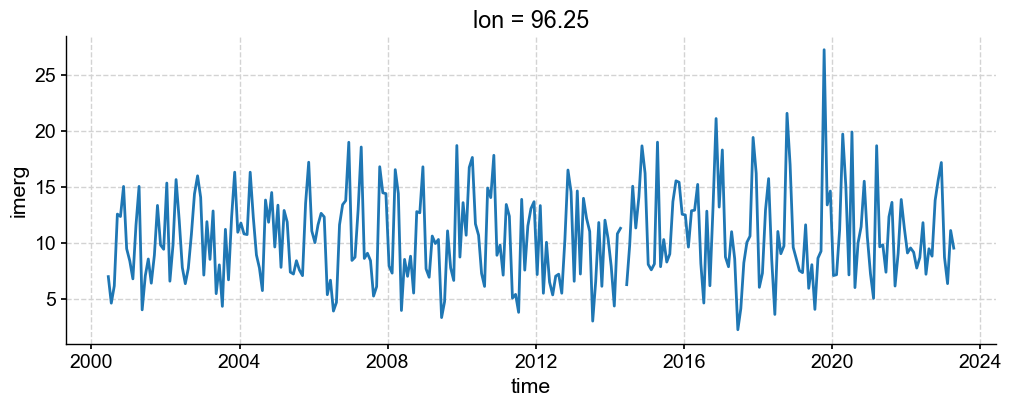

In [88]:

low_rain_lat_avg[:,12].plot(figsize=(12, 4))

/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_30173/4168397321.py:15: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies  # Periods in months


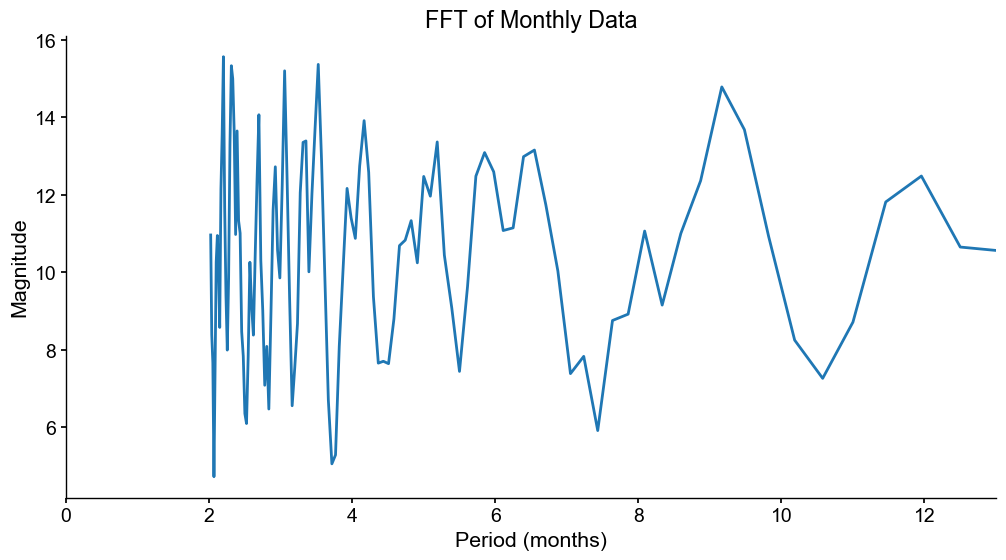

In [264]:

df = pd.DataFrame(low_rain_lat_avg[:,12]).rolling(window=3).mean()
# Perform FFT
fft_result = np.fft.fft(df)
#plt.plot(fft_result)

# Get the frequencies corresponding to the FFT result
n = df.size
frequencies = np.fft.fftfreq(n, d=1)  # d=1 for monthly data

# Only take the positive frequencies for plotting
positive_frequencies = frequencies[:n//2]
magnitude = np.abs(fft_result)[:n//2]

# Convert frequency to periods (in months)
periods = 1 / positive_frequencies  # Periods in months

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(periods, magnitude)
plt.xlim(0, 13)  # Limit x-axis to 13 months for clarity
plt.xlabel('Period (months)')
plt.ylabel('Magnitude')
plt.title('FFT of Monthly Data')
plt.grid()
plt.show()

In [ ]:
# Since low_rain_lat_avg is a 2D array (time, longitude)
fft_results = []

# Loop over each longitude index
for lon_index in range(low_rain_lat_avg.shape[1]):  # Adjusted to 2D
    # Create DataFrame and apply rolling mean
    df = pd.DataFrame(low_rain_lat_avg[:, lon_index]).rolling(window=3).mean()
    df_clean = df.dropna()

    # Check if df_clean is empty
    if df_clean.empty:
        print(f"Data for longitude index {lon_index} is empty after rolling mean.")
        continue  # Skip this longitude if there's no data

    # Perform FFT
    fft_result = np.fft.fft(df_clean)

    # Get frequencies corresponding to the FFT result
    n = df_clean.size
    frequencies = np.fft.fftfreq(n, d=1)  # d=1 for monthly data

    # Only take the positive frequencies for analysis
    positive_frequencies = frequencies[:n // 2]
    magnitude = np.abs(fft_result)[:n // 2]

    # Convert frequency to periods (in months)
    periods = 1 / positive_frequencies

    # Store results for this longitude
    fft_results.append((periods, magnitude))


In [ ]:

# Assuming low_rain_lat_avg is a 2D array (time, longitude)
fft_results = []
lon_ind = []

# Loop over each longitude index
for lon_index in range(low_rain_lat_avg.shape[1]):
    df = pd.DataFrame(low_rain_lat_avg[:, lon_index]).rolling(window=3).mean()
    df_clean = df.dropna()

    if df_clean.empty:
        #print(f"Data for longitude index {lon_index} is empty after rolling mean.")
        # Append NaN array of appropriate length to fft_results
        #fft_results.append(np.nan )  # Append a NaN
        continue

    fft_result = np.fft.fft(df_clean)
    n = df_clean.size
    frequencies = np.fft.fftfreq(n, d=1)

    positive_frequencies = frequencies[:n // 2]
    magnitude = np.abs(fft_result)[:n // 2]
    periods = 1 / positive_frequencies
    lon_ind += [lon_index]
    # Store results for this longitude
    fft_results.append(magnitude)

# Convert the list of magnitudes into a 2D array (longitude, period)
fft_magnitude_array = np.array(fft_results)
fft_magnitude_array = np.squeeze(fft_magnitude_array)
# Prepare periods for contour plot (assuming they are the same for all longitudes)
# Create a meshgrid for periods and longitudes
longitudes = low_rain_lat_avg.coords['lon'].values 
#periods = 1 / np.fft.fftfreq(df_clean.size, d=1)[:n // 2]

curr_lons = longitudes[lon_ind]
curr_lons.shape
fft_magnitude_array.shape


darray = xr.DataArray(data=fft_magnitude_array[:,1:],
                      dims=['lon','periods'],
                      coords={'lon':curr_lons,'periods':periods[1:]})


FFT_low_rain_lat_avg = darray.reindex(lon=longitudes)



In [ ]:
# Assuming high_rain_lat_avg is a 2D array (time, longitude)
fft_results = []
lon_ind = []

# Loop over each longitude index
for lon_index in range(high_rain_lat_avg.shape[1]):
    df = pd.DataFrame(high_rain_lat_avg[:, lon_index]).rolling(window=3).mean()
    df_clean = df.dropna()

    if df_clean.empty:
        #print(f"Data for longitude index {lon_index} is empty after rolling mean.")
        # Append NaN array of appropriate length to fft_results
        #fft_results.append(np.nan )  # Append a NaN
        continue

    fft_result = np.fft.fft(df_clean)
    n = df_clean.size
    frequencies = np.fft.fftfreq(n, d=1)

    positive_frequencies = frequencies[:n // 2]
    magnitude = np.abs(fft_result)[:n // 2]
    periods = 1 / positive_frequencies
    lon_ind += [lon_index]
    # Store results for this longitude
    fft_results.append(magnitude)

# Convert the list of magnitudes into a 2D array (longitude, period)
fft_magnitude_array = np.array(fft_results)
fft_magnitude_array = np.squeeze(fft_magnitude_array)
# Prepare periods for contour plot (assuming they are the same for all longitudes)
# Create a meshgrid for periods and longitudes
longitudes = low_rain_lat_avg.coords['lon'].values 
#periods = 1 / np.fft.fftfreq(df_clean.size, d=1)[:n // 2]

curr_lons = longitudes[lon_ind]
curr_lons.shape
fft_magnitude_array.shape

darray = xr.DataArray(data=fft_magnitude_array[:,1:],
                      dims=['lon','periods'],
                      coords={'lon':curr_lons,'periods':periods[1:]})


FFT_high_rain_lat_avg = darray.reindex(lon=longitudes)


### Plot for lat avg

Text(0, 0.5, 'Periods')

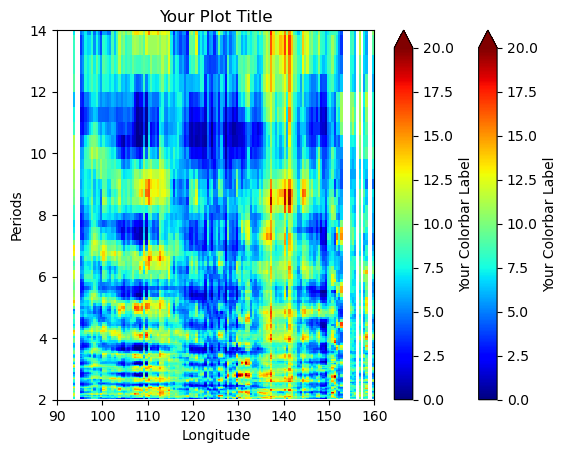

In [55]:
# Plot with specified axes and color limits
FFT_low_rain_lat_avg.plot(x='lon', y='periods', cmap='jet', robust=True,
              vmin=0, vmax=20, cbar_kwargs={'label': 'Your Colorbar Label'})

# Set y-axis limits
plt.ylim(2, 14)

# Add titles and labels if necessary
plt.title('Your Plot Title')
plt.xlabel('Longitude')  # Adjust if necessary
plt.ylabel('Periods')     # Adjust if necessary

# Plot with specified axes and color limits
FFT_high_rain_lat_avg.plot(x='lon', y='periods', cmap='jet', robust=True,
              vmin=0, vmax=20, cbar_kwargs={'label': 'Your Colorbar Label'})

# Set y-axis limits
plt.ylim(2, 14)

# Add titles and labels if necessary
plt.title('Your Plot Title')
plt.xlabel('Longitude')  # Adjust if necessary
plt.ylabel('Periods')     # Adjust if necessary



/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_46455/3442161610.py:22: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_46455/3442161610.py:22: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_46455/3442161610.py:22: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_46455/3442161610.py:22: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_46455/3442161610.py:22: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_46455/3442161610.py:22: RuntimeWarning: divide by zero encountered in divide

array([-10.95, -10.45,  -9.95,  -9.45,  -8.95,  -8.45,  -7.95,  -7.45,
        -6.95,  -6.45,  -5.95,  -5.45,  -4.95,  -4.45,  -3.95,  -3.45,
        -2.95,  -2.45,  -1.95,  -1.45,  -0.95,  -0.45,   0.05,   0.55,
         1.05,   1.55,   2.05,   2.55,   3.05,   3.55,   4.05,   4.55,
         5.05,   5.55,   6.05,   6.55,   7.05,   7.55,   8.05,   8.55,
         9.05,   9.55])

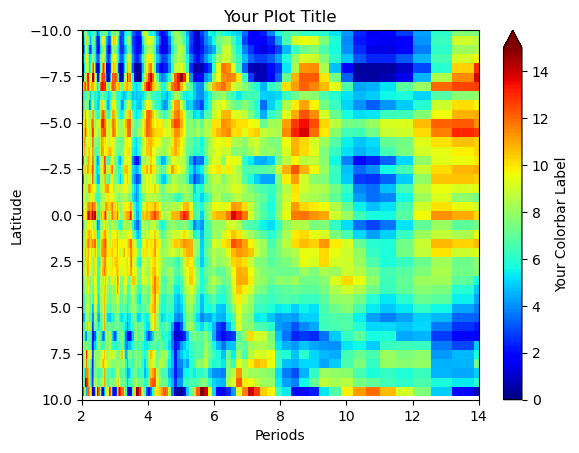

In [51]:
# Assuming high_rain_lon_avg is a 2D array (time, latitude)
fft_results = []
lat_ind = []

# Loop over each longitude index
for lat_index in range(high_rain_lon_avg.shape[1]):
    df = pd.DataFrame(high_rain_lon_avg[:, lat_index]).rolling(window=3).mean()
    df_clean = df.dropna()

    if df_clean.empty:
        #print(f"Data for longitude index {lon_index} is empty after rolling mean.")
        # Append NaN array of appropriate length to fft_results
        #fft_results.append(np.nan )  # Append a NaN
        continue

    fft_result = np.fft.fft(df_clean)
    n = df_clean.size
    frequencies = np.fft.fftfreq(n, d=1)

    positive_frequencies = frequencies[:n // 2]
    magnitude = np.abs(fft_result)[:n // 2]
    periods = 1 / positive_frequencies
    lat_ind += [lat_index]
    # Store results for this longitude
    fft_results.append(magnitude)

# Convert the list of magnitudes into a 2D array (longitude, period)
fft_magnitude_array = np.array(fft_results)
fft_magnitude_array = np.squeeze(fft_magnitude_array)
# Prepare periods for contour plot (assuming they are the same for all longitudes)
# Create a meshgrid for periods and longitudes
latitudes = high_rain_lon_avg.coords['lat'].values 
#periods = 1 / np.fft.fftfreq(df_clean.size, d=1)[:n // 2]

curr_lats = latitudes[lat_ind]
curr_lats.shape
fft_magnitude_array.shape
periods.shape

darray = xr.DataArray(data=fft_magnitude_array[:,1:],
                      dims=['lat','periods'],
                      coords={'lat':curr_lats,'periods':periods[1:]})


FFT_high_rain_lon_avg = darray.reindex(lat=latitudes)

# Plot with specified axes and color limits
FFT_high_rain_lon_avg.plot( x='periods',y='lat', cmap='jet', robust=True,
              vmin=0, vmax=15, cbar_kwargs={'label': 'Your Colorbar Label'})

# Set y-axis limits
plt.ylim(10, -10)
plt.xlim(2, 14)

# Add titles and labels if necessary
plt.title('Your Plot Title')
plt.ylabel('Latitude')  # Adjust if necessary
plt.xlabel('Periods')     # Adjust if necessary


/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_46455/4081186431.py:22: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_46455/4081186431.py:22: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_46455/4081186431.py:22: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_46455/4081186431.py:22: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_46455/4081186431.py:22: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_46455/4081186431.py:22: RuntimeWarning: divide by zero encountered in divide

Text(0.5, 0, 'Periods')

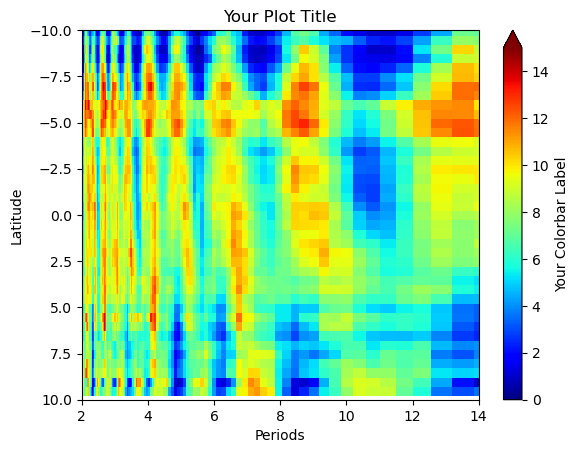

In [52]:
# Assuming low_rain_lon_avg is a 2D array (time, latitude)
fft_results = []
lat_ind = []

# Loop over each longitude index
for lat_index in range(low_rain_lon_avg.shape[1]):
    df = pd.DataFrame(low_rain_lon_avg[:, lat_index]).rolling(window=3).mean()
    df_clean = df.dropna()

    if df_clean.empty:
        #print(f"Data for longitude index {lon_index} is empty after rolling mean.")
        # Append NaN array of appropriate length to fft_results
        #fft_results.append(np.nan )  # Append a NaN
        continue

    fft_result = np.fft.fft(df_clean)
    n = df_clean.size
    frequencies = np.fft.fftfreq(n, d=1)

    positive_frequencies = frequencies[:n // 2]
    magnitude = np.abs(fft_result)[:n // 2]
    periods = 1 / positive_frequencies
    lat_ind += [lat_index]
    # Store results for this longitude
    fft_results.append(magnitude)

# Convert the list of magnitudes into a 2D array (longitude, period)
fft_magnitude_array = np.array(fft_results)
fft_magnitude_array = np.squeeze(fft_magnitude_array)
# Prepare periods for contour plot (assuming they are the same for all longitudes)
# Create a meshgrid for periods and longitudes
latitudes = low_rain_lon_avg.coords['lat'].values 
#periods = 1 / np.fft.fftfreq(df_clean.size, d=1)[:n // 2]

curr_lats = latitudes[lat_ind]
curr_lats.shape
fft_magnitude_array.shape
periods.shape

darray = xr.DataArray(data=fft_magnitude_array[:,1:],
                      dims=['lat','periods'],
                      coords={'lat':curr_lats,'periods':periods[1:]})


FFT_low_rain_lon_avg = darray.reindex(lat=latitudes)

# Plot with specified axes and color limits
FFT_low_rain_lon_avg.plot( x='periods',y='lat', cmap='jet', robust=True,
              vmin=0, vmax=15, cbar_kwargs={'label': 'Your Colorbar Label'})

# Set y-axis limits
plt.ylim(10, -10)
plt.xlim(2, 14)

# Add titles and labels if necessary
plt.title('Your Plot Title')
plt.ylabel('Latitude')  # Adjust if necessary
plt.xlabel('Periods')     # Adjust if necessary


In [224]:
#np.squeeze(fft_magnitude_array).shape
longitudes.shape
#periods.shape
fft_magnitude_array.shape


(120, 135)

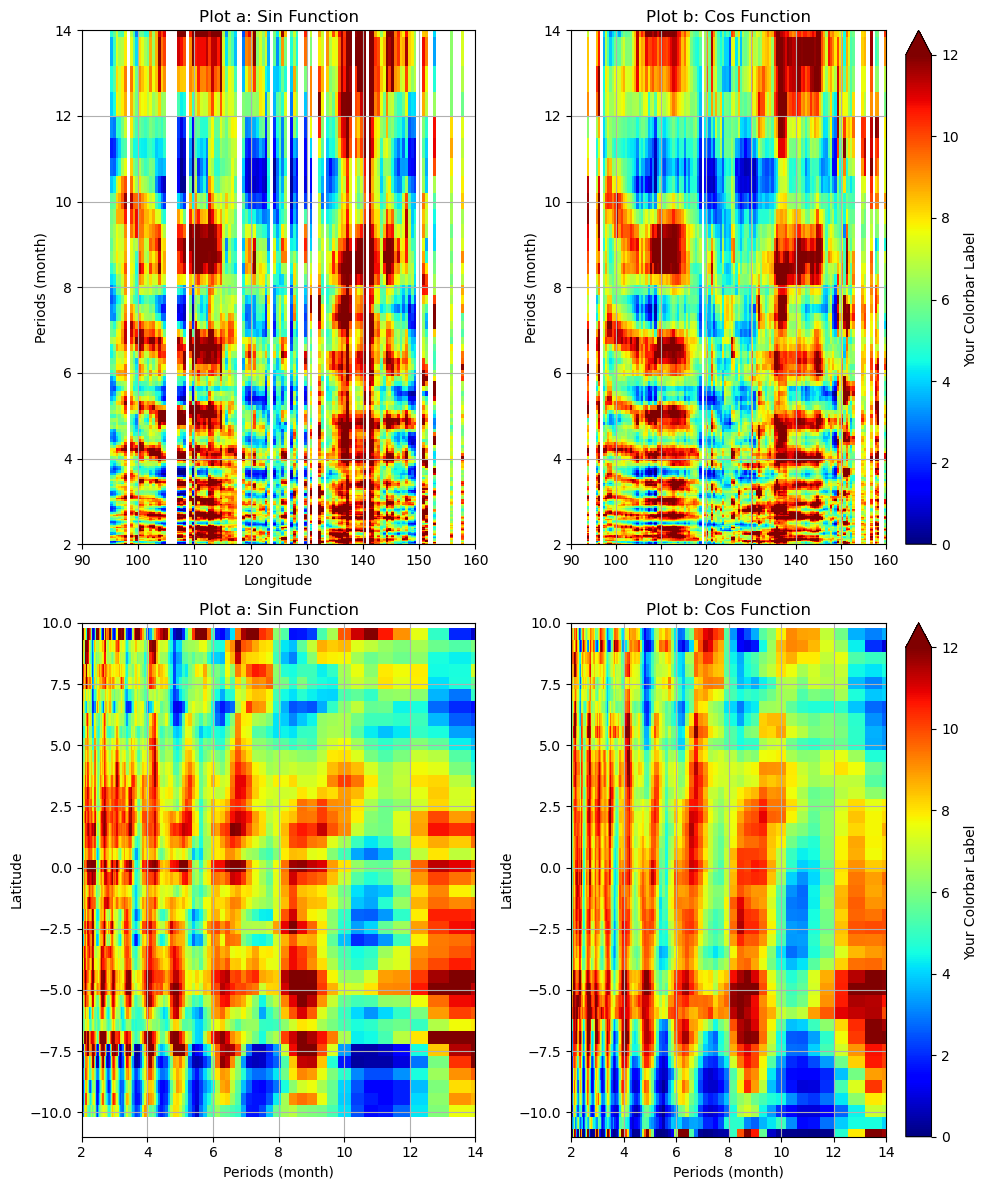

In [97]:

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 12))

# Plot the first DataArray
FFT_high_rain_lat_avg.plot(ax=axes[0, 0], x='lon', y='periods', cmap='jet', robust=True,
              vmin=0, vmax=12, add_colorbar=False)
axes[0, 0].set_title('Plot a: Sin Function')
axes[0, 0].set_ylabel('Periods (month)')
axes[0, 0].set_xlabel('Longitude')
axes[0, 0].grid()
# Set y-axis limits
axes[0, 0].set_ylim(2, 14)

# Plot the second DataArray
FFT_low_rain_lat_avg.plot(ax=axes[0,1],x='lon', y='periods', cmap='jet', robust=True,
              vmin=0, vmax=12, cbar_kwargs={'label': 'Your Colorbar Label'})
axes[0, 1].set_title('Plot b: Cos Function')
axes[0, 1].set_ylabel('Periods (month)')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].grid()
# Set y-axis limits
axes[0, 1].set_ylim(2, 14)

# Plot the third DataArray
FFT_high_rain_lon_avg.plot(ax=axes[1, 0], y='lat', x='periods', cmap='jet', robust=True,
              vmin=0, vmax=12, add_colorbar=False)
axes[1, 0].set_title('Plot a: Sin Function')
axes[1, 0].set_ylabel('Latitude')
axes[1, 0].set_xlabel('Periods (month)')
axes[1, 0].grid()
# Set y-axis limits
axes[1, 0].set_ylim(-11, 10)
axes[1, 0].set_xlim(2, 14)

# Plot the fourth DataArray
FFT_low_rain_lon_avg.plot(ax=axes[1,1],y='lat', x='periods', cmap='jet', robust=True,
              vmin=0, vmax=12, cbar_kwargs={'label': 'Your Colorbar Label'})
axes[1, 1].set_title('Plot b: Cos Function')
axes[1, 1].set_ylabel('Latitude')
axes[1, 1].set_xlabel('Periods (month)')
axes[1, 1].grid()
# Set y-axis limits
axes[1, 1].set_ylim(-11, 10)
axes[1, 1].set_xlim(2, 14)



# Remove the duplicate axis on the right
# axes[1, 1].axis('off')  # Hide the second axis in the bottom row


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

(2.0, 14.0)

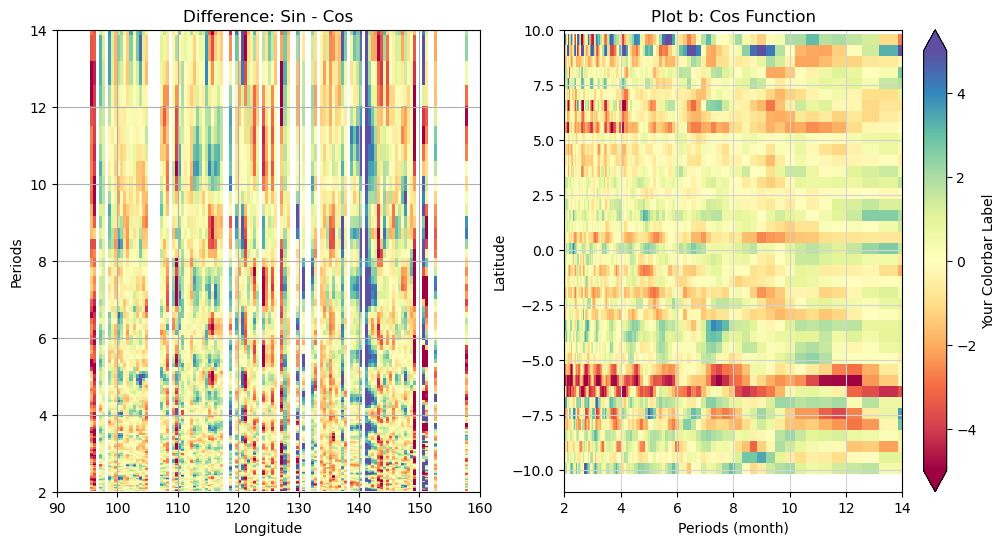

In [104]:
# Calculate the difference
diff_lat_avg  = FFT_high_rain_lat_avg - FFT_low_rain_lat_avg
diff_lon_avg  = FFT_high_rain_lon_avg - FFT_low_rain_lon_avg

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the difference, spanning both columns
diff_lat_avg.plot(ax=axes[ 0], x='lon', y='periods', cmap='Spectral', robust=True,
              vmin=-5, vmax=5, add_colorbar=False)
# Set y-axis limits
plt.ylim(2, 14)
axes[0].set_title('Difference: Sin - Cos')
axes[0].set_ylabel('Periods')
axes[0].set_xlabel('Longitude')
axes[0].grid()
# Set y-axis limits
axes[0].set_ylim(2, 14)


# Plot the fourth DataArray
diff_lon_avg.plot(ax=axes[1],y='lat', x='periods', cmap='Spectral', robust=True,
              vmin=-5, vmax=5, cbar_kwargs={'label': 'Your Colorbar Label'})
axes[1].set_title('Plot b: Cos Function')
axes[1].set_ylabel('Latitude')
axes[1].set_xlabel('Periods (month)')
axes[1].grid(color='lightgray')
# Set y-axis limits
axes[1].set_ylim(-11, 10)
axes[1].set_xlim(2, 14)

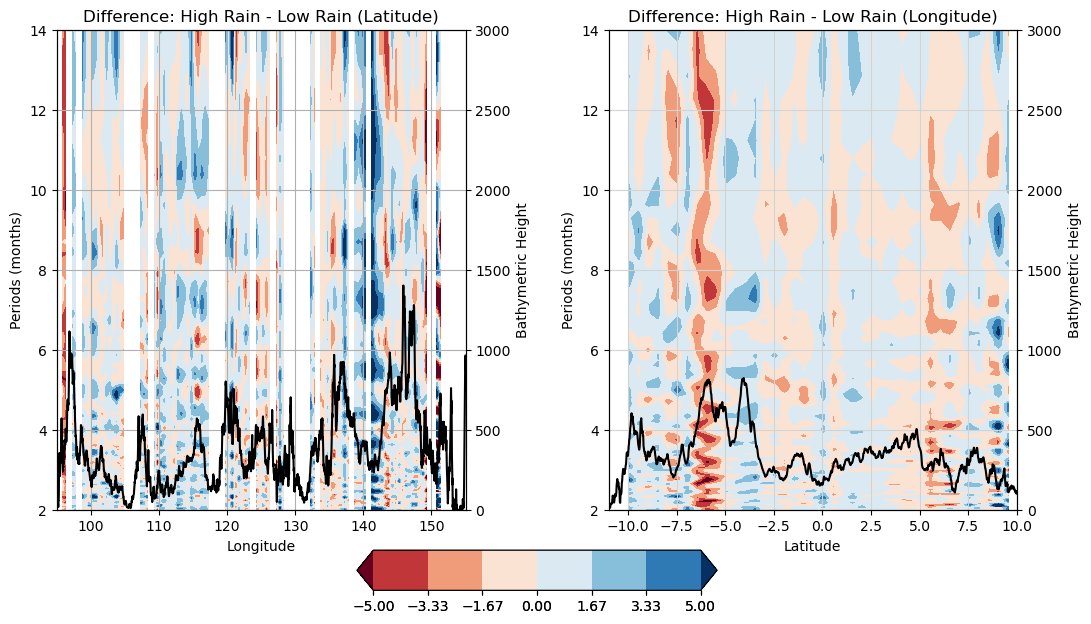

In [226]:
import matplotlib.pyplot as plt

# Calculate the difference
diff_lat_avg  = FFT_high_rain_lat_avg - FFT_low_rain_lat_avg
diff_lon_avg  = FFT_high_rain_lon_avg - FFT_low_rain_lon_avg
# Load bathymetric data (assuming it's already loaded as file1.B_BATHY)
bathy_mc = file1.B_BATHY[0, :, :].sel(LON16201_20401=slice(left,right), LAT4201_6601=slice(bottom, top))

# Calculate the mean over longitude, considering only land (bathy >= 0)
bathy_lat = bathy_mc.where(bathy_mc >= 0).mean(dim='LAT4201_6601', skipna=True)
bathy_lon = bathy_mc.where(bathy_mc >= 0).mean(dim='LON16201_20401', skipna=True)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot the latitude difference as a contour plot
contour_lat = diff_lat_avg.plot.contourf(ax=axes[0], x='lon', y='periods', cmap='RdBu', 
                                          vmin=-5, vmax=5, add_colorbar=False)
axes[0].set_title('Difference: High Rain - Low Rain (Latitude)')
axes[0].set_ylabel('Periods (months)')
axes[0].set_xlabel('Longitude')
axes[0].grid()
axes[0].set_ylim(2, 14)
axes[0].set_xlim(95, 155)
# Overlay bathymetric data on the latitude difference plot
#bathy_lat.plot.contour(ax=axes[0], levels=10, colors='black', linewidths=0.5, alpha=0.7)
# Overlay bathymetric data as a line plot on the latitude difference plot
#axes[0].plot(bathy_lat['LON16201_20401'], bathy_lat, color='black', linewidth=1.5, label='Bathymetry')
#axes[0].legend()
# Create a secondary y-axis for bathymetric data
ax2 = axes[0].twinx()

# Overlay bathymetric data as a line plot on the secondary y-axis
ax2.plot(bathy_lat['LON16201_20401'], bathy_lat, color='black', linewidth=1.5, label='Bathymetry')
ax2.set_ylabel('Bathymetric Height', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 3000)


# Plot the longitude difference as a contour plot
# contour_lon = diff_lon_avg.plot.contourf(ax=axes[1], x='lat', y='periods', cmap='Spectral', 
#                                          vmin=-5, vmax=5, cbar_kwargs={'label': 'Your Colorbar Label'})
contour_lon = diff_lon_avg.plot.contourf(ax=axes[1], x='lat', y='periods', cmap='RdBu', 
                                          vmin=-5, vmax=5,add_colorbar=False )
axes[1].set_title('Difference: High Rain - Low Rain (Longitude)')
axes[1].set_xlabel('Latitude')
axes[1].set_ylabel('Periods (months)')
axes[1].grid(color='lightgray')
axes[1].set_xlim(-11, 10)
axes[1].set_ylim(2, 14)

# Create a secondary y-axis for bathymetric data
ax_2 = axes[1].twinx()

# Overlay bathymetric data as a line plot on the secondary y-axis
ax_2.plot(bathy_lon['LAT4201_6601'], bathy_lon, color='black', linewidth=1.5, label='Bathymetry (m)')
ax_2.set_ylabel('Bathymetric Height', color='black')
ax_2.tick_params(axis='y', labelcolor='black')
ax_2.set_ylim(0, 3000)

# Add a colorbar for the first subplot
#
#cbar.set_label('Difference')


#cbar = plt.colorbar(contour_lat, ax=axes[1], orientation='horizontal', pad=0.1)
#cbar.set_label('Difference')
# Show the plot
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.35, hspace=0.9)
cbar = plt.colorbar(contour_lat, orientation='horizontal', pad=0.1, shrink=0.7, aspect=9)
cbar.ax.set_position([0.35, -0.65, 0.3, 0.9])  # [left, bottom, width, height]
cbar = plt.colorbar(contour_lat, ax=axes[1], orientation='horizontal', pad=0.1, shrink=0., aspect=9)
cbar.ax.set_position([0.35, -0.65, 0.3, 0.9])  # [left, bottom, width, height]
plt.show()


In [225]:
low_rain_lat_avg

freqs,mags = [],[]
for ii in low_rain_lat_avg.lon:
    data = low_rain_lat_avg.sel(lon=ii)
    n_data = data.dropna(dim='time').values
    try:
        freq,magintude = do_fft(n_data)
    except ValueError:
        freq,magnitude = np.nan,np.nan
    freqs += [freq]
    mags += [magintude]

len(mags)

/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_30173/3846598628.py:13: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_30173/3846598628.py:13: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_30173/3846598628.py:13: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_30173/3846598628.py:13: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_30173/3846598628.py:13: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / positive_frequencies
/var/folders/m0/tclj5vzn3bbc2d6hjw4qgrz8h39kf4/T/ipykernel_30173/3846598628.py:13: RuntimeWarning: divide by zero encountered in divide

140

In [208]:
for ii in 

AttributeError: 'DataArray' object has no attribute 'lon'

In [ ]:
def do_fft(data):
    fft_result = np.fft.fft(data)

    # Get frequencies corresponding to the FFT result
    n = data.size
    frequencies = np.fft.fftfreq(n, d=1)  # d=1 for monthly data

    # Only take the positive frequencies for analysis
    positive_frequencies = frequencies[:n // 2]
    magnitude = np.abs(fft_result)[:n // 2]

    # Convert frequency to periods (in months)
    periods = 1 / positive_frequencies

    # Store results for this longitude
    return frequencies,magnitude

freq,mag = xr.apply_ufunc(low_rain_lat_avg,do_fft)

In [222]:
dft_frame = pd.DataFrame(longitudes,columns=['longitude'])



dft_frame['freqs'] = freqs





,longitude,freqs
0,90.25,NaN
1,90.75,NaN
2,91.25,NaN
3,91.75,NaN
4,92.25,NaN
...,...,...
135,157.75,"[0.0, 0.0036496350364963502, 0.007299270072992..."
136,158.25,"[0.0, 0.0036496350364963502, 0.007299270072992..."
137,158.75,NaN
138,159.25,NaN
